**Little questions that I would have asked if we had an oral exam:**
(meaning that you shouldn't read or google or think for more than 5 seconds to answer them)

 - How do you create markdown cell in Jupyter? (with keyboard commands)
 - How do you add a cell above the current one in Jupyter (with keyboard command)? 
 - What does it mean that variables are dynamically typed in python?
 - What's the difference between python and Fortran integers?
 - Explain the difference between lists, sets and tuples in python.
 - What does negative index mean when accessing list elements?
 - How do you print the first N elements of a list?
 - How do you print every Nth element of a list?
 - How do you print the reverse list?
 - Give an example of a list comprehension.
 - Give an example of cell and line magic commands in Jupyter.
 - What are keyword function arguments in python and what is their advantage?
 - Why shouldn't you do from numpy import *?
 - What is the advantage of using numpy arrays over lists? What are the dangers?
 - What's the purpose of __str__ method in a python class?
 - How do you make "+" operator work for your class?
 - What package can you use in python for symbolic calculations?



### **Problem1:**

Write a function that calculates the first N [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number).

In [1]:
def fibonacci(N):
    if N == 0:
        return 1
    elif N == 1:
        return 1
    else:
        return fibonacci(N-1) + fibonacci(N-2)

N = 10
[fibonacci(i) for i in range(N)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

### **Problem2:**

Generate random data for 2D points coordinates. Write a function that plots them with different colors for each 90 degree section with the origin in the center. This problem should be coded as a class, i.e. you should be able to execute the code:

```
pr=Problem2()
pr.generate()
pr.display()
```

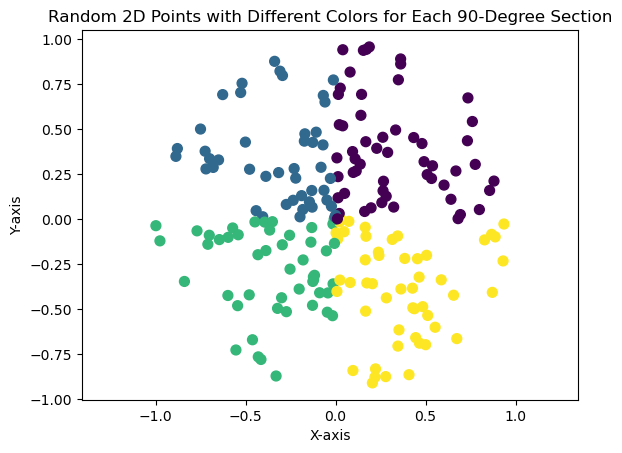

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Problem2:
    def __init__(self, N):
        self.N = N
        self.points = self.generate()

    def generate(self):
        # Generate random polar coordinates
        angles = np.random.uniform(0, 2 * np.pi, self.N)
        distances = np.random.uniform(0, 1, self.N)

        # Convert polar coordinates to Cartesian coordinates
        x = distances * np.cos(angles)
        y = distances * np.sin(angles)

        return np.column_stack((x, y))

    def display(self):
        # Calculate angles of each point in degrees
        angles_deg = np.degrees(np.arctan2(self.points[:, 1], self.points[:, 0]))

        # Map angles to the range [0, 360)
        angles_deg = (angles_deg + 360) % 360

        # Determine the color for each point based on the 90-degree sections
        colors = (angles_deg / 90).astype(int)

        # Plot the points with different colors for each 90-degree section
        plt.scatter(self.points[:, 0], self.points[:, 1], c=colors, s=50)
        plt.title('Random 2D Points with Different Colors for Each 90-Degree Section')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.axis('equal')  # Ensure equal scaling of axes
        plt.show()

# Example usage:
N = 200
pr = Problem2(N)
pr.generate()
pr.display()

### **Problem3:**

Write a decorator that calls a function twice.

In [3]:
def call_twice(func):
    def wrapper(*args, **kwargs):
        result_first_call = func(*args, **kwargs)
        result_second_call = func(*args, **kwargs)
        return result_first_call, result_second_call
    return wrapper

# Example usage:
@call_twice
def example_function():
    print("Function called")
    return "Result"

result1, result2 = example_function()
print(f"Result of first call: {result1}")
print(f"Result of second call: {result2}")

Function called
Function called
Result of first call: Result
Result of second call: Result


### **Problem4:**

Use sympy to solve the equation `d^2y(x)/dx^2 + 9y(x)+x=0`
Check that it's correct (still using sympy). Hint: you can access the right hand side of solution expression with `.rhs`.

Then set the constants equal to 1 and integrate the obtained function numerically using scipy over the interval [0,10]
Hint: you can use symply's lambdify function to turn sympy's expression into a function you can use later for scipy.


Solution:
Eq(y(x), C1*sin(3*x) + C2*cos(3*x) - x/9)


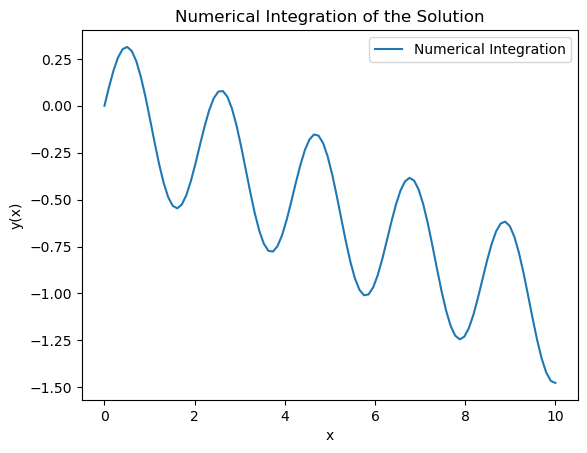

In [4]:
import sympy as sp
import numpy as np
from scipy.integrate import odeint

# Define the symbols and the function
x = sp.symbols('x')
y = sp.Function('y')

# Define the differential equation
diff_eq = sp.Derivative(y(x), x, x) + 9*y(x) + x

# Solve the differential equation
solution = sp.dsolve(diff_eq)
print("Solution:")
print(solution)

# Extract the right-hand side of the solution expression
rhs_expr = solution.rhs

# Set the constants equal to 1
rhs_expr = rhs_expr.subs({sp.symbols('C1'): 1, sp.symbols('C2'): 1})

# Lambdify the expression for numerical integration
y_numeric = sp.lambdify(x, rhs_expr, 'numpy')

# Define the interval for numerical integration
x_values = np.linspace(0, 10, 100)

# Integrate numerically using Scipy's odeint
initial_conditions = [0, 1]  # Initial values for y and dy/dx at x=0
result = odeint(lambda y, x: [y[1], -9*y[0] - x], initial_conditions, x_values)

# Plot the results
import matplotlib.pyplot as plt

plt.plot(x_values, result[:, 0], label='Numerical Integration')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Numerical Integration of the Solution')
plt.legend()
plt.show()


In [5]:
rhs_expr

-x/9 + sin(3*x) + cos(3*x)

### **Problem5:**
(advanced, would be given as a project to do at home and explain at the oral exam)

**Solving Laplace equation by Jacobi method**

The algorithm used in this problem solves Laplace’s equation on an evenly spaced grid through the use of a simple Jacobi iteration technique. The equation is a partial differential equation named after Pierre-Simon Laplace and are important in many fields of science: namely the fields of electromagnetism, astronomy and fluid dynamics. 

The equation has the form: 

```
d^2f/dx^2 + d^2f/dy^2=0
```

**The Algorithm (implement this as a class)**

 - create a numpy array to store 2 dimensional grid.

 -  Setup the initial constant boundary conditions in the following way:
     - the value at the lower left hand corner of the of the grid is 100, 
     - the value ascending and to the right is set to a linear gradient reaching zero at the opposite corners (see Figure1). The rest of the borders are fixed at zero. Please note, that these boundaries remain constant throughout the simulation.

 - Setup the initial condition of the inner grid elements as 0.5.

-  Write a jacobi method. At each iteration, the value of each inner matrix element needs to be recomputed from elements of the current iteration (in a similar way to how we did with game of life). The updating formula, based on numerical computation of second derivatives, is:

```
new_field[i,j]=0.25*(field[i,j-1]+field[i,j+1]+field[i+1,j]+field[i-1,j])
```

![](jacobiFigure1.jpg)

Use `imshow` to plot the result. There is a `jacobi.gif` file uploaded that shows how the solution looks like. Making gifs in python is troublesome, so just the final picuture would be enough.

Converged in 4381 iterations.


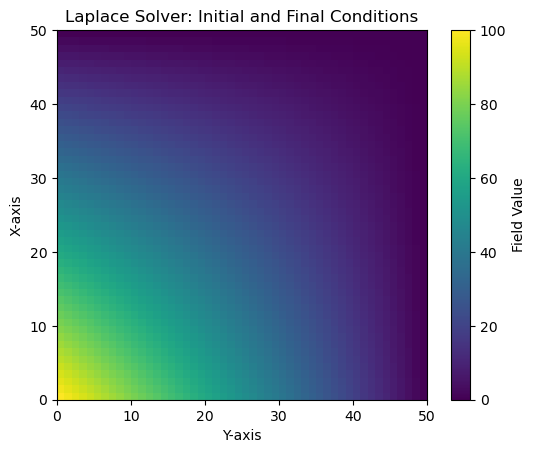

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class LaplaceSolver:
    def __init__(self, size_x, size_y):
        self.size_x = size_x
        self.size_y = size_y
        self.grid = np.zeros((size_x, size_y), dtype=float)

        # Set constant boundary conditions
        self.grid[0, 0] = 100.0

        for i in range(1, size_x - 1):
            self.grid[i, 0] = self.grid[i - 1, 0] - (100.0 / (size_x - 1))

        for j in range(1, size_y - 1):
            self.grid[-1, j] = 0

        for i in range(1, size_x - 1):
            self.grid[i, -1] = 0

        for j in range(1, size_y - 1):
            self.grid[0, j] = self.grid[0, j - 1] - (100.0 / (size_y - 1))

        # Set inner grid elements to 0.5
        self.grid[1:-1, 1:-1] = 0.5

    def jacobi_iteration(self):
        new_grid = self.grid.copy()

        for i in range(1, self.size_x - 1):
            for j in range(1, self.size_y - 1):
                # Jacobi update formula
                new_grid[i, j] = 0.25 * (self.grid[i, j - 1] + self.grid[i, j + 1] +
                                         self.grid[i + 1, j] + self.grid[i - 1, j])

        self.grid = new_grid

    def solve(self, max_iterations=10000, tolerance=1e-5):
        for iteration in range(max_iterations):
            old_grid = self.grid.copy()
            self.jacobi_iteration()

            # Check for convergence
            if np.max(np.abs(self.grid - old_grid)) < tolerance:
                print(f"Converged in {iteration + 1} iterations.")
                break

    def plot_solution(self):
        plt.imshow(self.grid, cmap='viridis', origin='lower', extent=[0, self.size_y, 0, self.size_x])
        plt.colorbar(label='Field Value')
        plt.title('Laplace Solver: Initial and Final Conditions')
        plt.xlabel('Y-axis')
        plt.ylabel('X-axis')
        plt.show()

    def animation(self):
        fig, ax = plt.subplots()
        im = ax.imshow(laplace_solver.grid, cmap='hot', origin='lower', extent=[0, size_y, 0, size_x])
        ax.set_title('Laplace Solver: Iterative Solution')
        ax.set_xlabel('Y-axis')
        ax.set_ylabel('X-axis')

        animation = FuncAnimation(fig, update, frames=range(2500), interval=25, blit=True)

# Example usage:
size_x = 50
size_y = 50

laplace_solver = LaplaceSolver(size_x, size_y)
laplace_solver.solve()

# Plotting the initial and final conditions
laplace_solver.plot_solution()

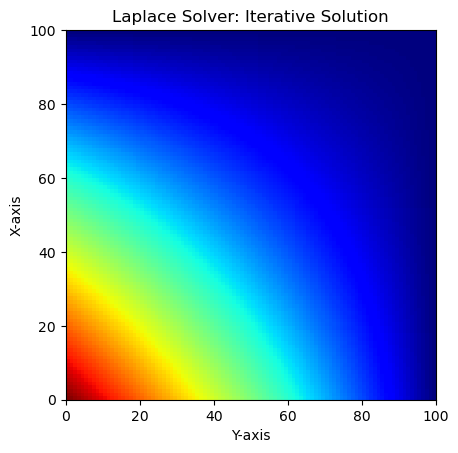

In [7]:
from matplotlib.animation import FuncAnimation

def update(frame):
    #old = laplace_solver.grid
    laplace_solver.jacobi_iteration()
    im.set_array(laplace_solver.grid)
    return [im]

# Example usage:
size_x = 100
size_y = 100

laplace_solver = LaplaceSolver(size_x, size_y)

fig, ax = plt.subplots()  
im = ax.imshow(laplace_solver.grid, cmap='jet', origin='lower', extent=[0, size_y, 0, size_x])
ax.set_title('Laplace Solver: Iterative Solution')
ax.set_xlabel('Y-axis')
ax.set_ylabel('X-axis')

# Set up the animation
animation = FuncAnimation(fig, update, frames=range(5000), interval=.6, blit=True)

# Save the animation as a GIF
animation.save('laplace_solver_simulation4.gif', writer='pillow')

# Display the animation in the Jupyter Notebook
#html_output = HTML(animation.to_jshtml())
#display(html_output)